<a href="https://colab.research.google.com/github/chirayurathi/personality-prediction-deep-learning/blob/main/SIN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install text-hammer

     |████████████████████████████████| 115 kB 30.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(8674, 6)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mbti_1_clean.csv')
df.head()

,Unnamed: 0,index,type,posts
0,0,0,INFJ,enfp intj moment sportscenter play prankswhat ...
1,1,1,ENTP,i find lack post alarmingsex boring position o...
2,2,2,INTP,good _ _ _ _ _ of course know blessing cursedo...
3,3,3,INTJ,dear intp enjoy conversation day esoteric gabb...
4,4,4,ENTJ,you re firedthat silly misconception approach ...


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df=df.dropna()
df.reset_index(inplace=True)

In [ ]:

import text_hammer as th
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_urls(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
    df[column] = df[column].progress_apply(lambda x:th.spelling_correction(x))
  
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)
df = text_preprocessing(df,"posts")
x=df['posts']

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

  0%|          | 0/8675 [00:00<?, ?it/s]

In [6]:


y = df.iloc[:,3].values
print("before: \n",y)
le=LabelEncoder()
y=le.fit_transform(y)

y=to_categorical(y)
print("After: \n",y)

before: 
 ['INFJ' 'ENTP' 'INTP' ... 'INTP' 'INFP' 'INFP']
After: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


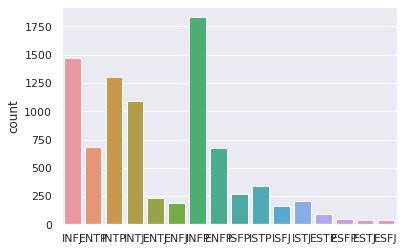

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.iloc[:,3].values)
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

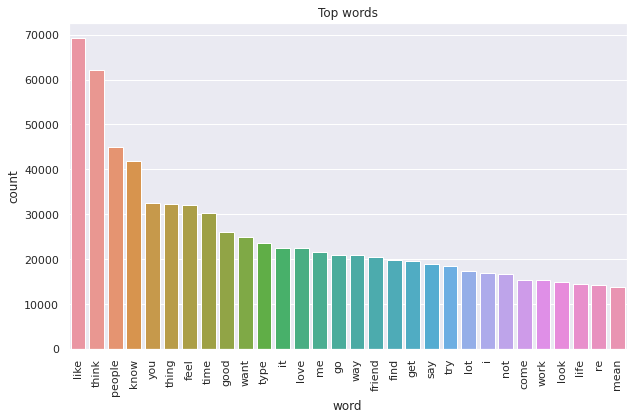

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
words_list = []
for post in df['posts']:
    words_list.extend(nltk.word_tokenize(post))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical')

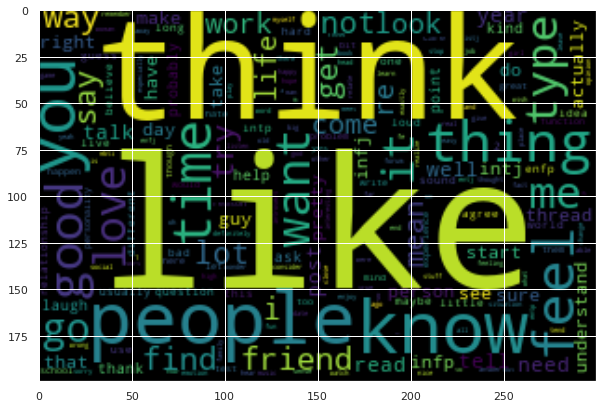

In [9]:
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In [10]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df.head()

,level_0,Unnamed: 0,index,type,posts,words_per_comment
0,0,0,0,INFJ,enfp intj moment sportscenter play prankswhat ...,5.64
1,1,1,1,ENTP,i find lack post alarmingsex boring position o...,8.92
2,2,2,2,INTP,good _ _ _ _ _ of course know blessing cursedo...,8.24
3,3,3,3,INTJ,dear intp enjoy conversation day esoteric gabb...,9.94
4,4,4,4,ENTJ,you re firedthat silly misconception approach ...,9.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

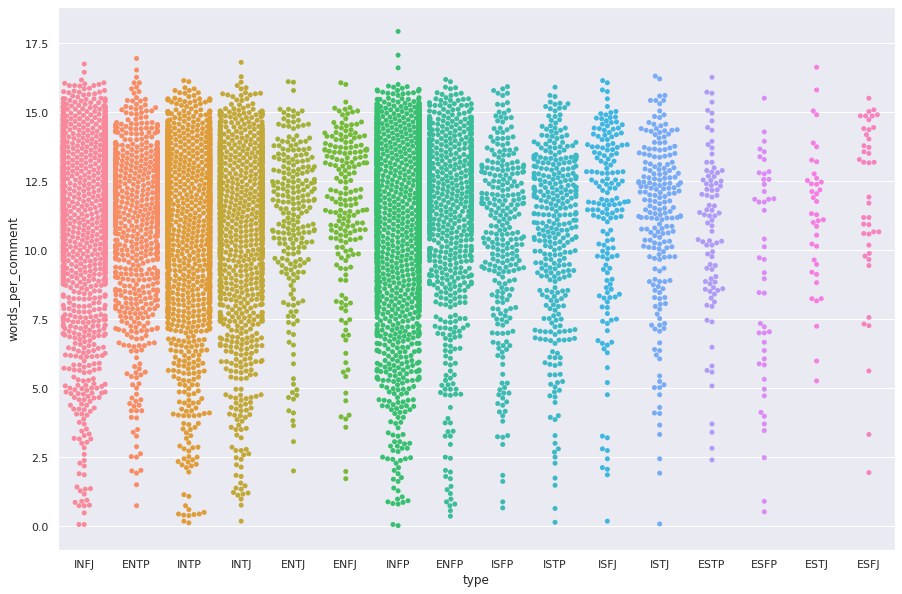

In [11]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)

In [12]:
voc_size = 50000
messages=df['posts'].copy()
messages



0       enfp intj moment sportscenter play prankswhat ...
1       i find lack post alarmingsex boring position o...
2       good _ _ _ _ _ of course know blessing cursedo...
3       dear intp enjoy conversation day esoteric gabb...
4       you re firedthat silly misconception approach ...
                              ...                        
8669    ixfp think cat fi dom reason especially websit...
8670    soif thread exist someplace which do heck dele...
8671    so question thing purple pill pick win lottery...
8672    i conflict right come want child honestly mate...
8673    it long personalitycafe change bit good like t...
Name: posts, Length: 8674, dtype: object

In [13]:

ps=PorterStemmer()
corpus=[]
for i in range (0,len(messages)):
    review = re.sub('[^a-zA-Z]','',messages[i])
    review=review.lower()
    review=review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english') ]
    review=''.join(review)
    corpus.append(review)

In [14]:
oe=[one_hot(words,voc_size) for words in corpus ]

In [15]:
sent_length=250
embedded_docs = pad_sequences(oe,padding='pre',maxlen = sent_length)
embedded_docs

array([[    0,     0,     0, ...,     0,     0, 17058],
       [    0,     0,     0, ...,     0,     0, 49335],
       [    0,     0,     0, ...,     0,     0, 40121],
       ...,
       [    0,     0,     0, ...,     0,     0, 35493],
       [    0,     0,     0, ...,     0,     0, 46872],
       [    0,     0,     0, ...,     0,     0, 18163]], dtype=int32)

In [51]:
dimension=100
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length = sent_length))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dropout(0.25))
model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 dropout_4 (Dropout)         (None, 250, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________


In [18]:

df.type.value_counts()

INFP    1832
INFJ    1469
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [17]:

X=np.array(embedded_docs)


In [19]:


ros = RandomOverSampler(random_state=42) # fit predictor and target variable
x_rus, y_rus = ros.fit_resample(X, y)


In [20]:

x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus, test_size=0.2, random_state=42)

In [52]:
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ),
            ModelCheckpoint('./model0.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [53]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64, callbacks = callbacks )

Epoch 1/20
367/367 [==============================] - ETA: 0s - loss: 2.1788 - accuracy: 0.3464
Epoch 00001: val_accuracy improved from -inf to 0.70851, saving model to ./model0.h5
367/367 [==============================] - 149s 399ms/step - loss: 2.1788 - accuracy: 0.3464 - val_loss: 1.0326 - val_accuracy: 0.7085
Epoch 2/20
367/367 [==============================] - ETA: 0s - loss: 0.6305 - accuracy: 0.8322
Epoch 00002: val_accuracy improved from 0.70851 to 0.84632, saving model to ./model0.h5
367/367 [==============================] - 144s 393ms/step - loss: 0.6305 - accuracy: 0.8322 - val_loss: 0.5089 - val_accuracy: 0.8463
Epoch 3/20
367/367 [==============================] - ETA: 0s - loss: 0.2546 - accuracy: 0.9494
Epoch 00003: val_accuracy did not improve from 0.84632
367/367 [==============================] - 144s 392ms/step - loss: 0.2546 - accuracy: 0.9494 - val_loss: 0.4809 - val_accuracy: 0.8436
Epoch 4/20
367/367 [==============================] - ETA: 0s - loss: 0.1580 - 

In [54]:
model = tf.keras.models.load_model('model0.h5')
preds = model.predict(x_test)
eval = model.evaluate(x_test,y_test)
print("Val. Loss: ",eval[0])
print("Val. Accuracy: ",eval[1])

184/184 [==============================] - 11s 56ms/step - loss: 0.5012 - accuracy: 0.8497
Val. Loss:  0.5011693835258484
Val. Accuracy:  0.8497356176376343


In [55]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[366   1   0   1   0   0   0   0   1   1   0   1   0   2   0   0]
 [  0 289   0   2   0   0   0   0   4   3   4   6   0   3   0   3]
 [  5   1 397   1   0   0   0   0   2   0   0   0   0   1   0   4]
 [  0   2   0 288   0   0   0   0   3   2   6   3   0   1   0   2]
 [  0   0   0   0 381   0   0   0   1   0   0   0   0   4   0   0]
 [  0   0   0   0   0 369   0   0   0   0   0   0   0   0   3   0]
 [  0   0   0   0   0   0 349   0   0   0   1   0   4   0   0   0]
 [  1   0   0   0   0   0   0 381   0   1   0   0   0   0   0   0]
 [  0   8   0   9   0   0   0   0 112  20  17  19   0   0   0   0]
 [  0  59   0  35   0   0   0   0 210 280 133 156   0   0   0   2]
 [  0   1   1   1   0   0   0   0   5   6 203  14   0   4   0   1]
 [  0   1   3   3   0   0   0   0   4   5   3 138   0   0   0   0]
 [  0   0   1   1   0   0   0   0   1   1   2   4 355   0   0   0]
 [  3   3   0   0   0   0   0   0   4   5   4   3   0 369   0   0]
 [  0   2   0   7   0   0   0   0   1   1   2   2   0   1 354 

In [22]:
max_features =50000
embedding_dim =64
sequence_length = 250

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, ))                                 

model2.add(tf.keras.layers.Conv1D(128,16, activation='relu'))                               

model2.add(tf.keras.layers.GlobalMaxPooling1D())

model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(16, activation='sigmoid'))

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 64)           3200064   
                                                                 
 conv1d (Conv1D)             (None, 235, 128)          131200    
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
Total params: 3,333,328
Trainable params: 3,333,328
Non-trainable params: 0
____________________________________________

In [23]:
history_2 = model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64, callbacks = callbacks )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


367/367 [==============================] - ETA: 0s - loss: 2.5092 - accuracy: 0.2062
Epoch 00001: val_accuracy improved from -inf to 0.53369, saving model to ./model.h5
367/367 [==============================] - 125s 338ms/step - loss: 2.5092 - accuracy: 0.2062 - val_loss: 1.6814 - val_accuracy: 0.5337
Epoch 2/20
367/367 [==============================] - ETA: 0s - loss: 1.2505 - accuracy: 0.5956
Epoch 00002: val_accuracy improved from 0.53369 to 0.76787, saving model to ./model.h5
367/367 [==============================] - 123s 336ms/step - loss: 1.2505 - accuracy: 0.5956 - val_loss: 0.8380 - val_accuracy: 0.7679
Epoch 3/20
367/367 [==============================] - ETA: 0s - loss: 0.7266 - accuracy: 0.7820
Epoch 00003: val_accuracy improved from 0.76787 to 0.82995, saving model to ./model.h5
367/367 [==============================] - 123s 337ms/step - loss: 0.7266 - accuracy: 0.7820 - val_loss: 0.5913 - val_accuracy: 0.8300
Epoch 4/20
367/367 [==============================] - ETA: 0

In [43]:
model = tf.keras.models.load_model('model.h5')
preds = model.predict(x_test)
eval = model.evaluate(x_test,y_test)
print("Val. Loss: ",eval[0])
print("Val. Accuracy: ",eval[1])

  1/184 [..............................] - ETA: 34s - loss: 0.3425 - accuracy: 0.8750

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


184/184 [==============================] - 7s 38ms/step - loss: 0.5461 - accuracy: 0.8521
Val. Loss:  0.5460711121559143
Val. Accuracy:  0.852123498916626


In [44]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[366   1   2   1   0   0   0   0   1   1   0   1   0   0   0   0]
 [  0 291   0   1   0   0   0   0   5   3   4   6   0   0   0   0]
 [  1   1 396   1   0   0   0   0   2   0   0   0   0   1   0   4]
 [  0   1   1 285   0   0   0   0   2   2   5   3   0   1   0   1]
 [  0   0   0   0 381   0   0   0   1   0   0   0   0   4   0   0]
 [  0   0   0   0   0 369   0   0   0   0   0   0   0   0   3   0]
 [  0   0   0   0   0   0 349   0   0   0   1   0   4   0   0   0]
 [  1   0   0   0   0   0   0 384   0   1   0   0   0   0   0   1]
 [  0   4   0  13   0   0   0   0 135  49  23  37   0   0   0   0]
 [  0  59   0  34   0   0   0   0 187 252 122 136   0   0   0   2]
 [  0   1   0   2   0   0   0   0   6   3 206  12   1   0   0   1]
 [  0   4   3   3   0   0   0   0   3   7   6 142   0   0   0   0]
 [  0   0   0   1   0   0   0   0   1   1   2   4 355   0   0   0]
 [  3   3   0   0   0   0   0   0   4   5   4   3   0 381   0   4]
 [  0   2   0   7   0   0   0   0   1   1   2   2   0   1 354 

In [26]:
max_features =50000
embedding_dim =64
sequence_length = 250

model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length, ))                                 

model3.add(tf.keras.layers.Conv1D(128,16, activation='relu'))                               

model3.add(tf.keras.layers.MaxPooling1D())

model3.add(tf.keras.layers.Conv1D(128,16, activation='relu'))                               

model3.add(tf.keras.layers.GlobalMaxPooling1D())

model3.add(tf.keras.layers.Dropout(0.5))

model3.add(tf.keras.layers.Dense(16, activation='sigmoid'))

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["accuracy"])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 64)           3200064   
                                                                 
 conv1d_1 (Conv1D)           (None, 235, 128)          131200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 117, 128)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 102, 128)          262272    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [45]:
callbacks = [EarlyStopping( monitor="val_accuracy", patience=2 ),
            ModelCheckpoint('./model3.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)]

In [46]:
history_3 = model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=64, callbacks = callbacks )

Epoch 1/20
367/367 [==============================] - ETA: 0s - loss: 2.7727 - accuracy: 0.0638
Epoch 00001: val_accuracy improved from -inf to 0.05918, saving model to ./model3.h5
367/367 [==============================] - 217s 592ms/step - loss: 2.7727 - accuracy: 0.0638 - val_loss: 2.7731 - val_accuracy: 0.0592
Epoch 2/20
367/367 [==============================] - ETA: 0s - loss: 2.7728 - accuracy: 0.0606
Epoch 00002: val_accuracy did not improve from 0.05918
367/367 [==============================] - 217s 591ms/step - loss: 2.7728 - accuracy: 0.0606 - val_loss: 2.7730 - val_accuracy: 0.0563
Epoch 3/20
367/367 [==============================] - ETA: 0s - loss: 2.7727 - accuracy: 0.0599
Epoch 00003: val_accuracy did not improve from 0.05918
367/367 [==============================] - 218s 593ms/step - loss: 2.7727 - accuracy: 0.0599 - val_loss: 2.7732 - val_accuracy: 0.0563


In [47]:
model = tf.keras.models.load_model('model3.h5')
preds = model.predict(x_test)
eval = model.evaluate(x_test,y_test)
print("Val. Loss: ",eval[0])
print("Val. Accuracy: ",eval[1])

  1/184 [..............................] - ETA: 38s - loss: 2.7751 - accuracy: 0.0000e+00

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


184/184 [==============================] - 13s 68ms/step - loss: 2.7731 - accuracy: 0.0592
Val. Loss:  2.773073673248291
Val. Accuracy:  0.0591847188770771


In [48]:
from sklearn.metrics import confusion_matrix
true_cat = []
for y in y_test:
  true_cat.append(np.where(y==1)[0])
predicted_cat = tf.argmax(preds, axis=1)
predicted_cat
print(confusion_matrix(predicted_cat, true_cat))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [375 368 404 351 381 369 349 384 352 330 379 347 360 392 358 364]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 